In [3]:

import numpy as np
import matplotlib.pyplot as plt

In [16]:
"""Perform Valid Discreet convolution."""


def convolve_grayscale_valid(images, kernel):
    """
    Perform Valid Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
    """
    kh, kw = kernel.shape
    m, h, w = images.shape
    oh = (h-kh) + 1
    ow = (w-kw) + 1
    kernel = np.repeat(kernel[np.newaxis,:, :], m, axis=0)
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        for j in range(0, ow):
            output[:, i, j] = np.sum(np.sum(images[:, i:i+kw, j:j+kh] * kernel,
                                            axis=2), axis=1)

    return output



(1000, 28, 28)
(1000, 26, 26)


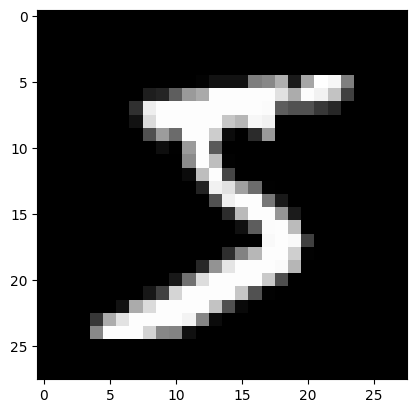

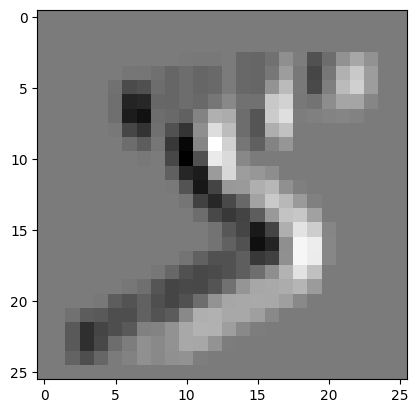

In [17]:

dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train'][0:1000]
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [30]:
def convolve_grayscale_same(images, kernel):
    """
    Perform same Discreet convolution.

    images is a numpy.ndarray with shape (m, h, w) containing
    multiple grayscale images
        m is the number of images
        h is the height in pixels of the images
        w is the width in pixels of the images

    kernel is a numpy.ndarray with shape (kh, kw) containing the kernel
    for the convolution
        kh is the height of the kernel
        kw is the width of the kernel
    """
    kh, kw = kernel.shape
    m, h, w = images.shape
    oh = (h-kh)+1
    ow = (w-kw)+1
    ph = abs((oh-h)//2)
    pw = abs((ow-w)//2)
    oh += 2*ph
    ow += 2*pw
    npad = ((0, 0), (ph, ph), (pw, pw))
    images = np.pad(images, npad, mode='constant', constant_values=0)
    kernel = np.repeat(kernel[np.newaxis, :, :], m, axis=0)
    output = np.zeros((m, oh, ow))
    for i in range(0, oh):
        for j in range(0, ow):
            output[:, i, j] = np.sum(np.sum(images[:, i:i+kw, j:j+kh] * kernel,
                                            axis=2), axis=1)

    return output


(1000, 28, 28)
(1000, 28, 28)


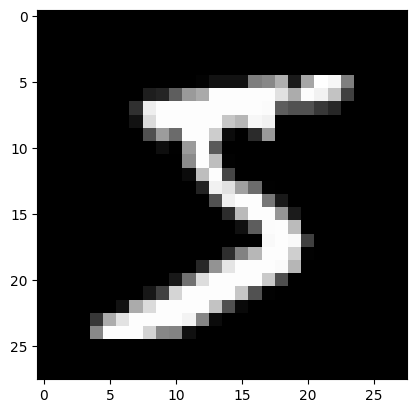

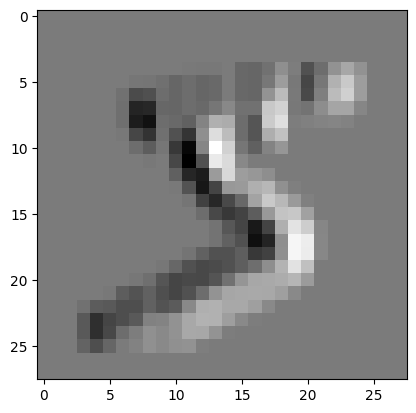

In [31]:
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train'][0:1000]
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()